# Reverse engineering de VERA Relaties API

### Korte beschrijving werkwijze
1. VERA heeft in januari 2022 de nieuwe OpenAPI specificaties gepubliceerd. Per domein wordt één API gepubliceerd op GitHub. Deze OpenAPI3 specificatie zijn flinke bestanden, circa 8000 regels code. In totaal zijn er dus 10 API's. 
2. In dit Notebook wordt de Vastgoed API ge-reverse-engineered zodat er inzicht komt in de dataobjecten in de VERA OpenAPI. Dit inzicht wordt verkregen door drie bestanden op te leveren: 
- een UML Class diagram gemaakt met PlantUML 
- een .csv bestand met de objecten en hun klassen
- een json bestand.

## 1. Basic info of the API and inspection

In [1]:
pwd

'C:\\Users\\31653\\Documents\\GitHub\\Notebooks\\de_alliantie\\VERA'

In [2]:
import glob
my_yamls=glob.glob('*.yaml')
my_yamls

['Algemeen.yaml',
 'Dossier.yaml',
 'Financien.yaml',
 'Kwaliteit.yaml',
 'Onderhoud.yaml',
 'Overeenkomsten.yaml',
 'Projectontwikkeling.yaml',
 'Relaties.yaml',
 'Vastgoed.yaml',
 'Woonruimteverdeling.yaml']

In [3]:
import yaml

# load the spec file and read the yaml to create a python dictionary 'spec'
with open('relaties.yaml') as f:
    spec = yaml.safe_load(f.read())

In [4]:
list(spec)

['openapi', 'info', 'servers', 'tags', 'paths', 'security', 'components']

In [5]:
OAS_version =spec['openapi']
API_name = spec['info']['title']
API_version =spec['info']['version']
print(OAS_version, API_name, API_version)

3.0.0 VERA-Relaties 4.0


## 2. Getting the paths and endpoints

In [6]:
#getting the paths
paths = list(spec['paths'])
len(paths)

35

In [7]:
#getting the paths and http verbs
endpoints_dict = {}
for i in range (len(paths)):
    endpoints_dict[paths[i]]=list(spec['paths'][paths[i]])
endpoints_dict 

{'/ping': ['get'],
 '/accounts': ['get', 'post', 'put', 'patch'],
 '/accounts/{id}': ['get', 'put', 'patch'],
 '/afspraken': ['get', 'post', 'put', 'patch'],
 '/afspraken/{id}': ['get', 'put', 'patch'],
 '/afspraak-opties': ['get', 'post', 'put', 'patch'],
 '/afspraak-opties/{id}': ['get', 'put', 'patch'],
 '/afspraakverzoeken': ['get', 'post', 'put', 'patch'],
 '/afspraakverzoeken/{id}': ['get', 'put', 'patch'],
 '/betaalgegevens': ['get', 'post', 'put', 'patch'],
 '/betaalgegevens/{id}': ['get', 'put', 'patch'],
 '/contactgegevens': ['get', 'post', 'put', 'patch'],
 '/contactgegevens/{id}': ['get', 'put', 'patch'],
 '/contactmomenten': ['get', 'post', 'put', 'patch'],
 '/contactmomenten/{id}': ['get', 'put', 'patch'],
 '/inkomens': ['get', 'post', 'put', 'patch'],
 '/inkomens/{id}': ['get', 'put', 'patch'],
 '/natuurlijk-personen': ['get', 'post', 'put', 'patch'],
 '/natuurlijk-personen/{id}': ['get', 'put', 'patch'],
 '/opleidingen': ['get', 'post', 'put', 'patch'],
 '/opleidingen/{

In [8]:
#value_list=[]
for key, value in endpoints_dict.items():
    #print(value)
    value_list = value
    for i in range (len(value_list)):
        print(value_list[i], key)

get /ping
get /accounts
post /accounts
put /accounts
patch /accounts
get /accounts/{id}
put /accounts/{id}
patch /accounts/{id}
get /afspraken
post /afspraken
put /afspraken
patch /afspraken
get /afspraken/{id}
put /afspraken/{id}
patch /afspraken/{id}
get /afspraak-opties
post /afspraak-opties
put /afspraak-opties
patch /afspraak-opties
get /afspraak-opties/{id}
put /afspraak-opties/{id}
patch /afspraak-opties/{id}
get /afspraakverzoeken
post /afspraakverzoeken
put /afspraakverzoeken
patch /afspraakverzoeken
get /afspraakverzoeken/{id}
put /afspraakverzoeken/{id}
patch /afspraakverzoeken/{id}
get /betaalgegevens
post /betaalgegevens
put /betaalgegevens
patch /betaalgegevens
get /betaalgegevens/{id}
put /betaalgegevens/{id}
patch /betaalgegevens/{id}
get /contactgegevens
post /contactgegevens
put /contactgegevens
patch /contactgegevens
get /contactgegevens/{id}
put /contactgegevens/{id}
patch /contactgegevens/{id}
get /contactmomenten
post /contactmomenten
put /contactmomenten
patch /c

In [9]:
#printing the paths, verbs and descriptions 
paths = list(spec['paths'])
for i in range (len(paths)):
    verbs = list(spec['paths'][paths[i]])
    for j in range (len(verbs)):
        description_string = spec['paths'][paths[i]][verbs[j]]['description']
        description_string = description_string.strip('\n')
        print(paths[i], verbs[j], description_string)

/ping get Een ping wordt beantwoord met response code 200
/accounts get Ophalen van Accounts
/accounts post Voegt een nieuw(e) Account toe.
/accounts put Vervangen van een Account op basis van overeenkomstige sleutelvelden.
/accounts patch Wijzigen van afzonderlijke attributen van een Account. In de meegestuurde entiteit moeten
sleutelvelden aanwezig zijn.
/accounts/{id} get Retourneert een Account met de gegeven identifier
/accounts/{id} put Vervangen van een Account
/accounts/{id} patch Wijzigen van een Account
/afspraken get Ophalen van Afspraken
/afspraken post Voegt een nieuw(e) Afspraak toe.
/afspraken put Vervangen van een Afspraak op basis van overeenkomstige sleutelvelden.
/afspraken patch Wijzigen van afzonderlijke attributen van een Afspraak. In de meegestuurde entiteit moeten
sleutelvelden aanwezig zijn.
/afspraken/{id} get Retourneert een Afspraak met de gegeven identifier
/afspraken/{id} put Vervangen van een Afspraak
/afspraken/{id} patch Wijzigen van een Afspraak
/afspr

## Getting the components

In [10]:
objects = list(spec['components']['schemas'])
print(len(objects))
objects.sort()

38


In [11]:
# super lambda function to remove '-sleutels' from the list of objects
objects = [x for x in objects if "-sleutels" not in x ]
print(objects)

['Account', 'Afspraak', 'AfspraakOptie', 'Afspraakverzoek', 'Betaalgegeven', 'Contactgegeven', 'Contactmoment', 'ExtraAttribuut', 'Foutbericht', 'Inkomen', 'NatuurlijkPersoon', 'Opleiding', 'Rechtspersoon', 'Referentiedata', 'Relatie', 'RelatieAdres', 'Relatiegroep', 'Relatierol', 'Signalering', 'Telefoonnummer']


In [16]:
spec['components']['schemas']

{'Account': {'type': 'object',
  'properties': {'id': {'type': 'string',
    'format': 'any',
    'description': 'De primaire sleutel van het gegeven in het bronsysteem. Je verstuurt een entiteit altijd met het eigen id. Id kan leeg zijn.'},
   'idExtern': {'type': 'string',
    'format': 'any',
    'description': 'De primaire sleutel van het gegeven in het doelsysteem. Deze idExtern wisselt om met id afhankelijk van de richting van de gegevensuitwisseling.'},
   'idGegevensbeheerder': {'type': 'string',
    'format': 'any',
    'description': 'De primaire sleutel van het gegeven van de gegevensbeheerder. Bijv. de overheid of andere standaarden.'},
   'code': {'type': 'string',
    'format': 'any',
    'description': 'De unieke code (Bijvoorbeeld om te tonen of te zoeken)'},
   'status': {'$ref': '#/components/schemas/Referentiedata',
    'description': 'De status van de registratie.Bijv. Geregistreerd, Geactiveerd, Beëindigd etc.'},
   'begindatum': {'type': 'string',
    'format': 'd

In [12]:
my_list= []
my_dict = spec['components']['schemas']['Punt']['allOf'][0]
for key, value in my_dict.items():
    my_string = str(value)
my_string = my_string.replace('#/components/schemas/', 'allOf ')
my_list.append(my_string)
print(my_list)

KeyError: 'Punt'

In [98]:
my_str='#/components/schemas/Geometrie'
print(my_str)

#/components/schemas/Geometrie


In [113]:
my_string.replace('#/components/schemas/', 'allOf ')

'allOf Geometrie'

In [85]:
spec['components']['schemas']['Punt']['allOf'][0]

{'$ref': '#/components/schemas/Geometrie'}

In [39]:
punt_list = spec['components']['schemas']['Punt']['allOf']
punt_list[1]

{'type': 'object',
 'properties': {'breedtegraad': {'type': 'number',
   'format': 'float',
   'description': 'De breedtegraad.'},
  'lengtegraad': {'type': 'number',
   'format': 'float',
   'description': 'De lengtegraad.'},
  'extra-attributen': {'description': 'Mogelijkheid om het bericht uit te breiden met attributen die nog niet in het logisch datamodel beschikbaar zijn',
   'type': 'array',
   'items': {'$ref': '#/components/schemas/ExtraAttribuut'}},
  'informatieobjecten': {'type': 'string',
   'format': 'uri',
   'description': 'Referentie naar Informatieobject in de vorm: vera/v4/informatieobjecten/12345'}}}

In [37]:
punt_list_dict = punt_list[1]
list(punt_list_dict['properties'])

['breedtegraad', 'lengtegraad', 'extra-attributen', 'informatieobjecten']

In [42]:
spec['components']['schemas']['Punt']['allOf'][1]['properties']

{'breedtegraad': {'type': 'number',
  'format': 'float',
  'description': 'De breedtegraad.'},
 'lengtegraad': {'type': 'number',
  'format': 'float',
  'description': 'De lengtegraad.'},
 'extra-attributen': {'description': 'Mogelijkheid om het bericht uit te breiden met attributen die nog niet in het logisch datamodel beschikbaar zijn',
  'type': 'array',
  'items': {'$ref': '#/components/schemas/ExtraAttribuut'}},
 'informatieobjecten': {'type': 'string',
  'format': 'uri',
  'description': 'Referentie naar Informatieobject in de vorm: vera/v4/informatieobjecten/12345'}}

In [10]:
#creating a dictionary with objects and their properties
object_dict ={}
#objects = list(spec['components']['schemas'])
for i in range (len(objects)):
    try:
        object_dict[objects[i]]=list(spec['components']['schemas'][objects[i]]['properties'])#['properties']
    except:
        my_list= []
        my_dict = spec['components']['schemas'][objects[i]]['allOf'][0]
        for key, value in my_dict.items():
            my_string = str(value)
        my_string = my_string.replace('#/components/schemas/', 'allOf: ')
        my_list.append(my_string)
        object_dict[objects[i]] = my_list+list(spec['components']['schemas'][objects[i]]['allOf'][1]['properties'])
object_dict 

{'Adres': ['id',
  'idExtern',
  'idGegevensbeheerder',
  'code',
  'soort',
  'adres',
  'huisletter',
  'huisnummer',
  'huisnummerToevoeging',
  'postcode',
  'straatnaam',
  'extra-attributen',
  'informatieobjecten'],
 'AdresseerbaarObjectBasisregistratie': ['id',
  'idExtern',
  'idGegevensbeheerder',
  'code',
  'bagGebruikersOppervlakte',
  'bagGebruiksdoelen',
  'bagHoofdadres',
  'bagIdentificatie',
  'bagInOnderzoek',
  'bagNevenadressen',
  'bagOfficieel',
  'bagOppervlakteVerblijfsobject',
  'bagPandenBasisregistratie',
  'bagStatus',
  'geometrie',
  'extra-attributen',
  'informatieobjecten'],
 'BagAdres': ['id',
  'idExtern',
  'idGegevensbeheerder',
  'code',
  'bagNummeraanduidingIdentificatie',
  'bagOpenbareRuimteIdentificatie',
  'bagNummeraanduidingInOnderzoek',
  'bagNummeraanduidingOfficieel',
  'bagNummeraanduidingStatus',
  'bagOpenbareRuimteInOnderzoek',
  'bagOpenbareruimteOfficieel',
  'bagOpenbareruimtestatus',
  'extra-attributen',
  'informatieobjecten']

### Creating a plantuml file

In [11]:
textfile = open(API_name+"_API_plantuml.txt", "w")
textfile.write('@startuml\n')
for key, value in object_dict.items():
    textfile.write('class '+str(key) +'{\n')
    for i in range (len(value)):
        textfile.write(value[i] + "\n")
    textfile.write('}\n')
#textfile.write('}\n')
textfile.write('@enduml')
textfile.close() 

In [12]:
import glob
my_txts = glob.glob('*.txt')
my_txts

['VERA-Onderhoud_API_plantuml.txt', 'VERA-Vastgoed_API_plantuml.txt']

In [13]:
pwd

'C:\\Users\\31653\\Documents\\GitHub\\Notebooks\\de_alliantie\\VERA'

In [14]:
#check the plantuml file manually
%pycat C:\\Users\\31653\\Documents\\GitHub\\Notebooks\\de_alliantie\\VERA\VERA-Vastgoed_API_plantuml.txt

In [15]:
#convert the txt file to an .png image using plantuml
!python -m plantuml VERA-Vastgoed_API_plantuml.txt

[{'filename': 'VERA-Vastgoed_API_plantuml.txt', 'gen_success': True}]


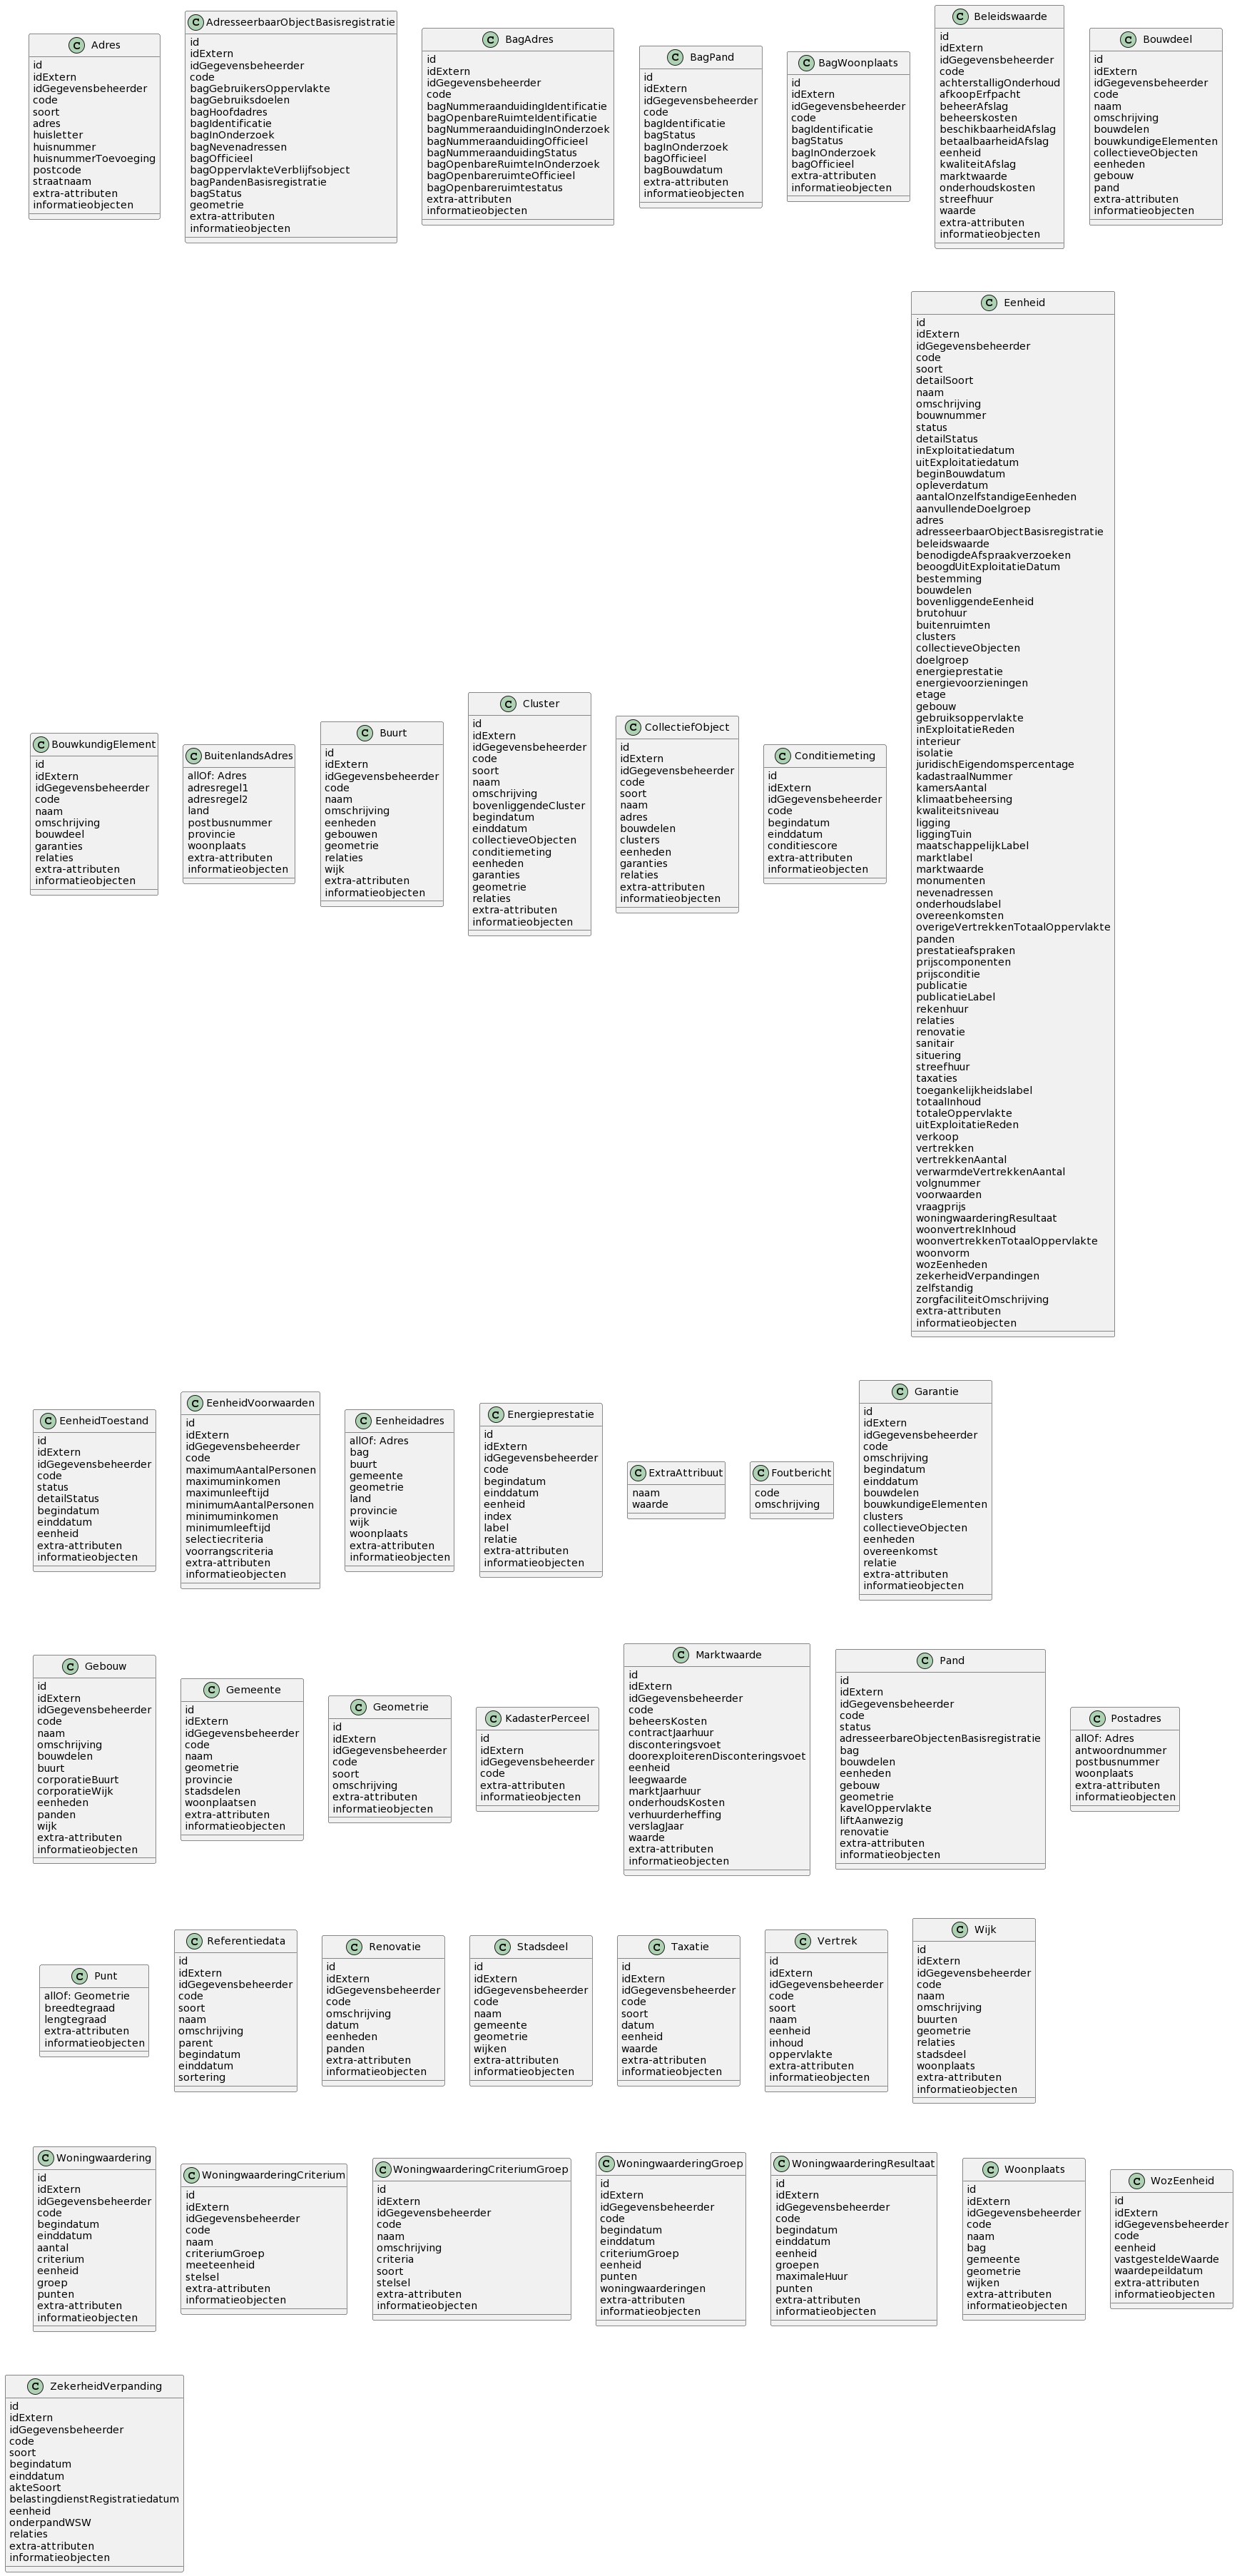

In [16]:
#show the generated png
from IPython import display
display.Image(filename="VERA-Vastgoed_API_plantuml.png", width=1000, height=800)

### Saving as a .csv file

In [17]:
with open(API_name+"_API_objecten.csv", mode="w") as my_csv:
    for key, value in object_dict.items():
        my_csv.write(str(key)+";")
        for i in range (len(value)-1):
            my_csv.write(value[i]+",")#write values + a comma  
        my_csv.write(value[-1]+"\n") #write last value (and no comma)

In [18]:
import glob
my_csvs=glob.glob('*.csv')
my_csvs

['VERA-Onderhoud_API_objecten.csv', 'VERA-Vastgoed_API_objecten.csv']

In [20]:
#check the plantuml file manually
%pycat C:\\Users\\31653\\Documents\\GitHub\\Notebooks\\de_alliantie\\VERA\\VERA-Vastgoed_API_objecten.csv

### Saving as a .json file

In [21]:
#converting the python dict to a JSON 
import json 
      
# Serializing json  
json_object = json.dumps(object_dict, indent = 4) 
print(json_object)

{
    "Adres": [
        "id",
        "idExtern",
        "idGegevensbeheerder",
        "code",
        "soort",
        "adres",
        "huisletter",
        "huisnummer",
        "huisnummerToevoeging",
        "postcode",
        "straatnaam",
        "extra-attributen",
        "informatieobjecten"
    ],
    "AdresseerbaarObjectBasisregistratie": [
        "id",
        "idExtern",
        "idGegevensbeheerder",
        "code",
        "bagGebruikersOppervlakte",
        "bagGebruiksdoelen",
        "bagHoofdadres",
        "bagIdentificatie",
        "bagInOnderzoek",
        "bagNevenadressen",
        "bagOfficieel",
        "bagOppervlakteVerblijfsobject",
        "bagPandenBasisregistratie",
        "bagStatus",
        "geometrie",
        "extra-attributen",
        "informatieobjecten"
    ],
    "BagAdres": [
        "id",
        "idExtern",
        "idGegevensbeheerder",
        "code",
        "bagNummeraanduidingIdentificatie",
        "bagOpenbareRuimteIdentificat

In [22]:
#saving the json
import json
with open(API_name+ '_API_data.json', 'w', encoding='utf-8') as f:
    json.dump(json_object, f, ensure_ascii=False, indent=4)

In [23]:
#check saved file
import glob
my_jsons = glob.glob('*.json')
my_jsons

['VERA-Onderhoud_API_objecten.json', 'VERA-Vastgoed_API_data.json']